In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from math import pi
import math 


fifa = pd.read_csv('FIFA Player Info.csv', keep_default_na = False)
fifa = fifa.drop(columns='Unnamed: 0')
data = fifa[['Name','Pace', 'Shooting','Passing', 'Dribbling', 'Defending', 'Physicality']]
HeatmapData = data.groupby('Name').mean()
labels = np.array(HeatmapData.columns.values)
N = len(labels)

angles2 = []
for i in range(N):
    ang = 90 + i*180/np.pi
    if ang > 360:
        ang = abs(360 - ang)
    angles2.append(ang)
angles2.sort()
angles = [ math.radians(i) for i in angles2]

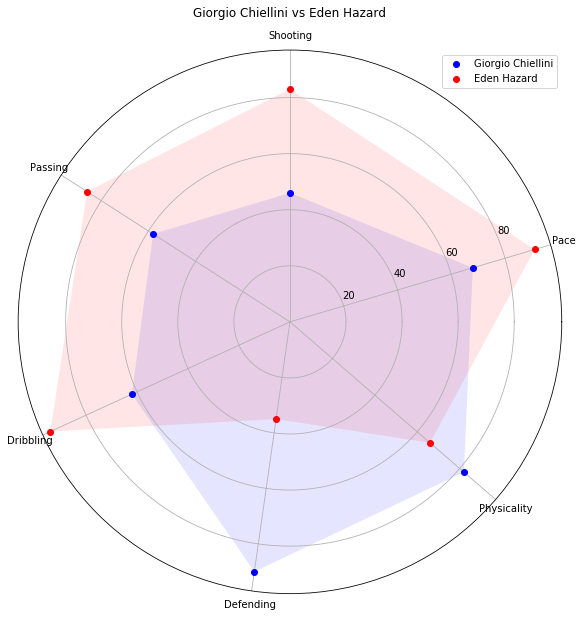

In [6]:
#name = 'Lionel Messi'
#name2 = 'Neymar Jr'
name = fifa.Name.tolist()[10]
name2 = fifa.Name.tolist()[4]
stats=HeatmapData.loc[name, labels]
fig=plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'bo', linewidth=1)
ax.fill(angles, stats, 'b', alpha=0.1)
stats2=HeatmapData.loc[name2,labels]
ax.plot(angles, stats2, 'ro', linewidth=1)
ax.fill(angles, stats2, 'r', alpha=0.1)
ax.set_thetagrids(angles2, labels)
ax.set_title(name + " vs " + name2)
ax.set_label('Label via method')
ax.legend([name, name2])
ax.grid(True)